In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the files correctly
orders = pd.read_csv(r"C:\Users\godsw\OneDrive\Desktop\TECHCRUSH\Tasks\orders.csv")
order_details = pd.read_csv(r"C:\Users\godsw\OneDrive\Desktop\TECHCRUSH\Tasks\order_details.csv")
pizzas = pd.read_csv(r"C:\Users\godsw\OneDrive\Desktop\TECHCRUSH\Tasks\pizzas.csv")
pizza_types = pd.read_csv(r"C:\Users\godsw\OneDrive\Desktop\TECHCRUSH\Tasks\pizza_types.csv", encoding='cp1252')

In [2]:
# Merge step-by-step
merged1 = pd.merge(order_details, orders, on='order_id', how='inner')
merged2 = pd.merge(merged1, pizzas, on='pizza_id', how='inner')
final_df = pd.merge(merged2, pizza_types, on='pizza_type_id', how='inner')


In [3]:
# Save final result
final_df.to_excel(r'C:\Users\godsw\OneDrive\Desktop\TECHCRUSH\Tasks\pizza_sales\merged_pizza_place_sales.xlsx', index=False)

print("Merged files saved successfully!")

Merged files saved successfully!


In [4]:
merged_data = pd.read_excel(r"C:\Users\godsw\OneDrive\Desktop\TECHCRUSH\Tasks\merged_pizza_place_sales.xlsx")

### Question 1

#### Calculating the total revenue/sales

In [5]:
merged_data.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [6]:
merged_data.describe()

,order_details_id,order_id,quantity,price
count,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132
std,14035.529381,6180.119770,0.143077,3.621789
min,1.000000,1.000000,1.000000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000
max,48620.000000,21350.000000,4.000000,35.950000


In [7]:
merged_data['revenue'] = merged_data['quantity'] * merged_data['price']
total_revenue = merged_data['revenue'].sum()

In [8]:
print(f'Total revenue :', total_revenue)

Total revenue : 817860.05


### Question 2

#### Find the total quantity sold

In [9]:
total_quantity_sold = merged_data['quantity'].sum()
print(f'Total quantity sold:', total_quantity_sold)

Total quantity sold: 49574


### Question 3

#### Find the total orders

In [10]:
total_orders = merged_data['order_id'].nunique()
print(f'The total orders were:', total_orders)

The total orders were: 21350


### Question 4

#### Number of pizza types sold

In [11]:
num_pizza_types = merged_data['pizza_type_id'].nunique()
print(f'Number of pizza types sold:', num_pizza_types)

Number of pizza types sold: 32


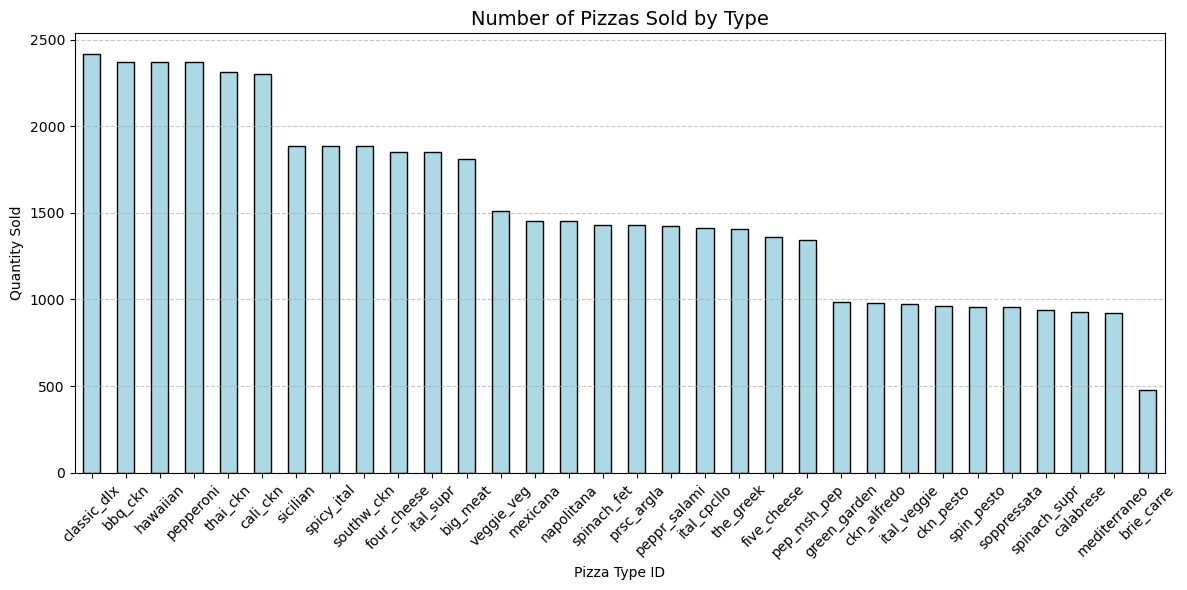

In [12]:
# Count number of times each pizza type was sold
pizza_type_counts = merged_data['pizza_type_id'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
pizza_type_counts.plot(kind='bar', color='lightblue', edgecolor='black')

plt.title('Number of Pizzas Sold by Type', fontsize=14)
plt.xlabel('Pizza Type ID')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Question 5

#### Average price of pizza

In [13]:
piz_avg_price = merged_data['price'].mean()
print(f'The average price of pizza:', piz_avg_price)

The average price of pizza: 16.494132044426163


### Question 6

#### The peak hours of sale

In [14]:
#View the columns of the dataset
print(merged_data.columns)

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'date', 'time',
       'pizza_type_id', 'size', 'price', 'name', 'category', 'ingredients',
       'revenue'],
      dtype='object')


In [15]:
# Convert 'time' column to datetime (ensure it's in correct format like HH:MM:SS)
merged_data['time'] = pd.to_datetime(merged_data['time'], format='%H:%M:%S', errors='coerce')

In [16]:
#Extract the hour from the time column
merged_data['hour'] = merged_data['time'].dt.hour

In [17]:
#
sales_by_hour = merged_data.groupby('hour')['revenue'].sum().sort_values(ascending=False)

In [18]:
print(sales_by_hour)

hour
12    111877.90
13    106065.70
18     89296.85
17     86237.45
19     72628.90
16     70055.40
14     59201.40
20     58215.40
15     52992.30
11     44935.80
21     42029.80
22     22815.15
23      1121.35
10       303.65
9         83.00
Name: revenue, dtype: float64


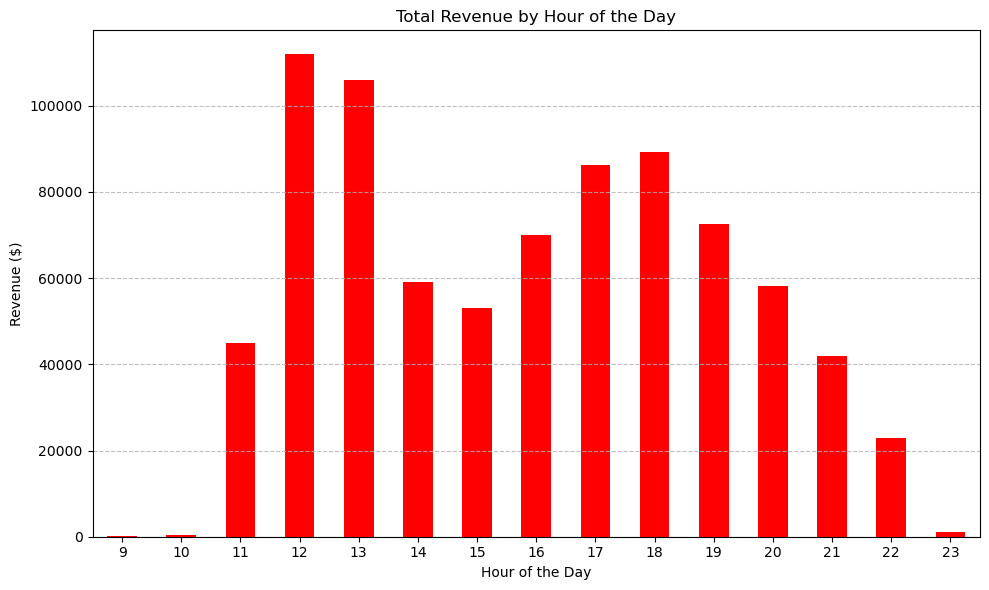

In [19]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
sales_by_hour.sort_index().plot(kind='bar', color='red')
plt.title('Total Revenue by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

## Question 7

### Find the total sales made on each day of the week. Which day of the week is when sales are made the most?

In [20]:
# Force convert 'date' column to datetime and coerce errors
merged_data['date'] = pd.to_datetime(merged_data['date'], errors='coerce')

# Drop rows where conversion failed (if any)
merged_data = merged_data.dropna(subset=['date'])

# Now extract the day of the week
merged_data['day_of_week'] = merged_data['date'].dt.day_name()

# Group by day of the week and sum revenue
sales_by_day = merged_data.groupby('day_of_week')['revenue'].sum().sort_values(ascending=False)

# Display results
print("Total Sales by Day of the Week:")
print(sales_by_day)

# Highlight the peak day
top_day = sales_by_day.idxmax()
top_sales = sales_by_day.max()
print(f"\n Peak sales day: {top_day} with {top_sales:,.2f} in revenue.")


Total Sales by Day of the Week:
day_of_week
Friday       136073.90
Thursday     123528.50
Saturday     123182.40
Wednesday    114408.40
Tuesday      114133.80
Monday       107329.55
Sunday        99203.50
Name: revenue, dtype: float64

 Peak sales day: Friday with 136,073.90 in revenue.


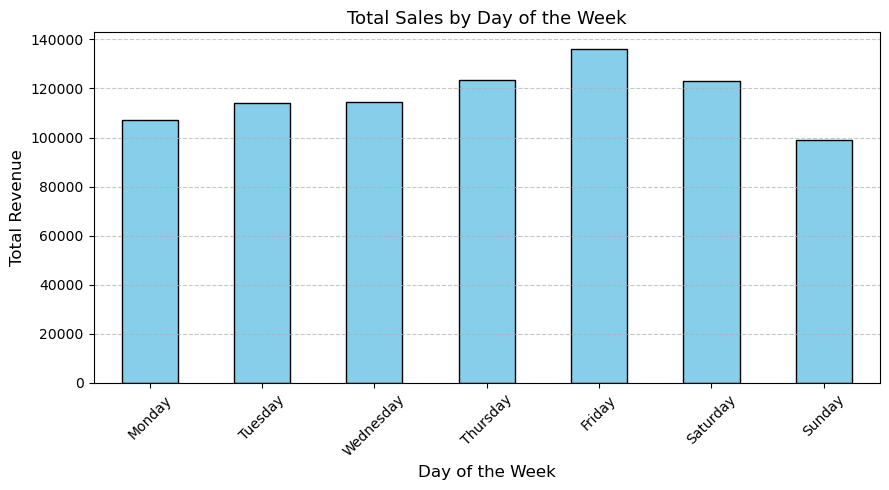

In [21]:
# Reorder days of the week for better readability
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day = sales_by_day.reindex(day_order)

# Plotting
plt.figure(figsize=(9, 5))
sales_by_day.plot(kind='bar', color='skyblue', edgecolor='black')

# Titles and labels
plt.title('Total Sales by Day of the Week', fontsize=13)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

## Question 8

### Find the top 5 bestselling pizzas

Top 5 Bestselling Pizzas:
pizza_type_id
classic_dlx    2453
bbq_ckn        2432
hawaiian       2422
pepperoni      2418
thai_ckn       2371
Name: quantity, dtype: int64


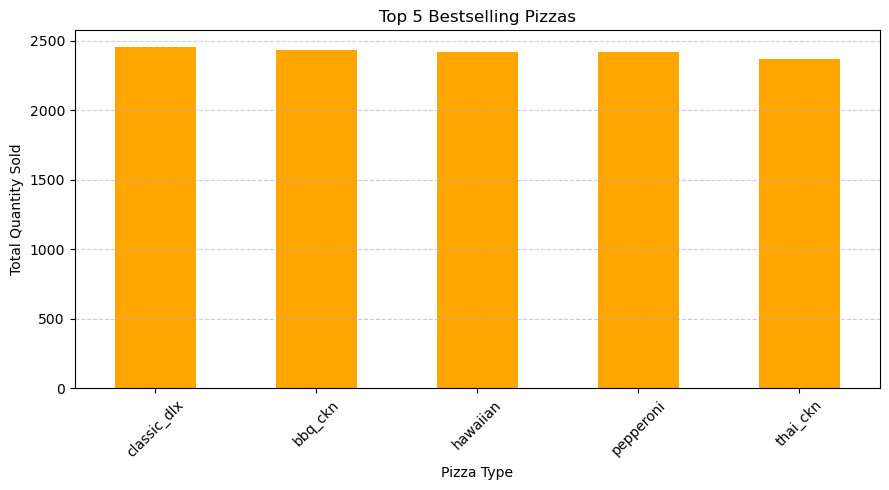

In [22]:
# Group by pizza type and sum the quantity
top_pizzas = merged_data.groupby('pizza_type_id')['quantity'].sum().sort_values(ascending=False).head(5)

# Display result
print("Top 5 Bestselling Pizzas:")
print(top_pizzas)

# Visualize
plt.figure(figsize=(9, 5))
top_pizzas.plot(kind='bar', color='orange')
plt.title('Top 5 Bestselling Pizzas')
plt.xlabel('Pizza Type')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### The top 5 best selling pizzas are: classic dlx, bbq chicken, hawaiian, pepperoni and thai chicken.

## Question 9

### Find the sales made in each month. Any trend noticeable?

Monthly Sales:
month
2015-01    69793.30
2015-02    65159.60
2015-03    70397.10
2015-04    68736.80
2015-05    71402.75
2015-06    68230.20
2015-07    72557.90
2015-08    68278.25
2015-09    64180.05
2015-10    64027.60
2015-11    70395.35
2015-12    64701.15
Freq: M, Name: revenue, dtype: float64


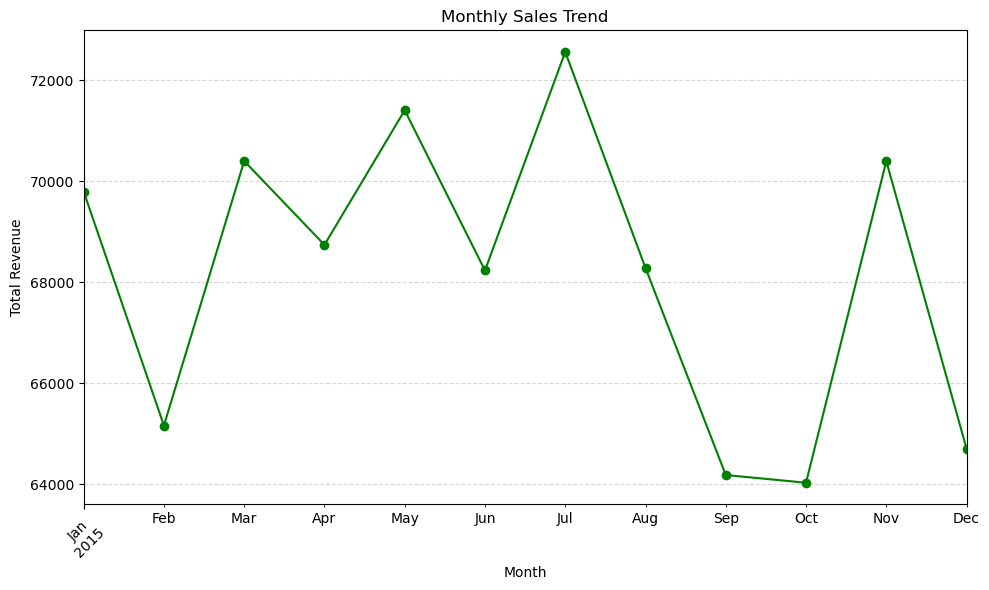

In [23]:
# Extract month and year for grouping
merged_data['month'] = merged_data['date'].dt.to_period('M')

# Group by month and sum revenue
monthly_sales = merged_data.groupby('month')['revenue'].sum().sort_index()

# Display results
print("Monthly Sales:")
print(monthly_sales)

# Visualize
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### It can be seen that sales gradually increased towards mid-year: Notice a rise from January (69.8k) to July (72.6k). This suggests a possible summer boost in demand.
#### Slight drop in the autumn months: Sales dipped during September (64.2k) and October (64.0k) — the lowest months overall.
#### Mild rebound toward the end of the year: Sales picked up again in November (70.4k), possibly due to holiday activity. 
#### However, December (64.7k) unexpectedly dips again — which could suggest that pizza is not a primary holiday season choice, or maybe fewer orders occurred late in December.

# Question 10

#### Are there pizza types that are not doing well on the menu?

In [24]:
# Group by pizza type and sum the quantity and revenue
pizza_performance = merged_data.groupby('pizza_type_id')[['quantity', 'revenue']].sum().sort_values(by='quantity')

# Display the bottom 5 least sold pizza types
least_selling = pizza_performance.head(5)
print("Least Performing Pizza Types:")
print(least_selling)

Least Performing Pizza Types:
               quantity   revenue
pizza_type_id                    
brie_carre          490  11588.50
mediterraneo        934  15360.50
calabrese           937  15934.25
spinach_supr        950  15277.75
soppressata         961  16425.75


#### Brie carre, mediterraneo, calabrese, spinach supr and sppressata are the least performing pizza types

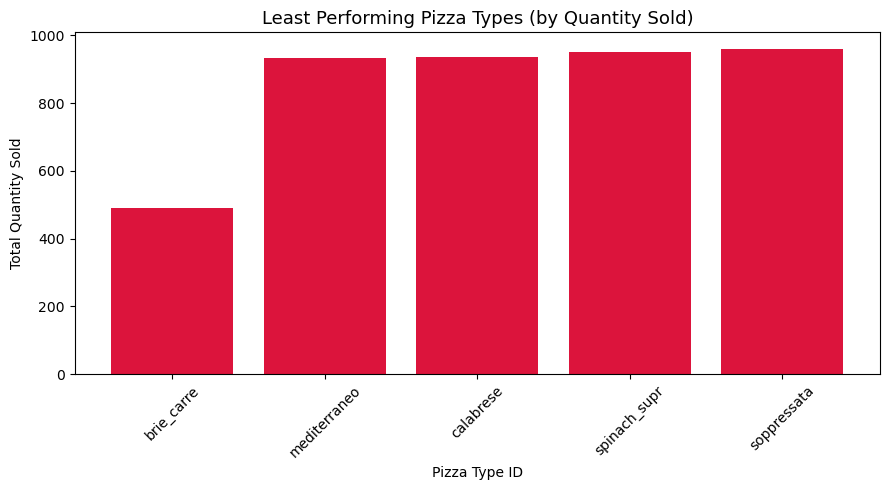

In [25]:
# Plot least performing pizzas
least_selling = pizza_performance.head(5)

plt.figure(figsize=(9, 5))
plt.bar(least_selling.index, least_selling['quantity'], color='crimson')
plt.title('Least Performing Pizza Types (by Quantity Sold)', fontsize=13)
plt.xlabel('Pizza Type ID')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Other analysis

### 1. Monthly revenue per pizza

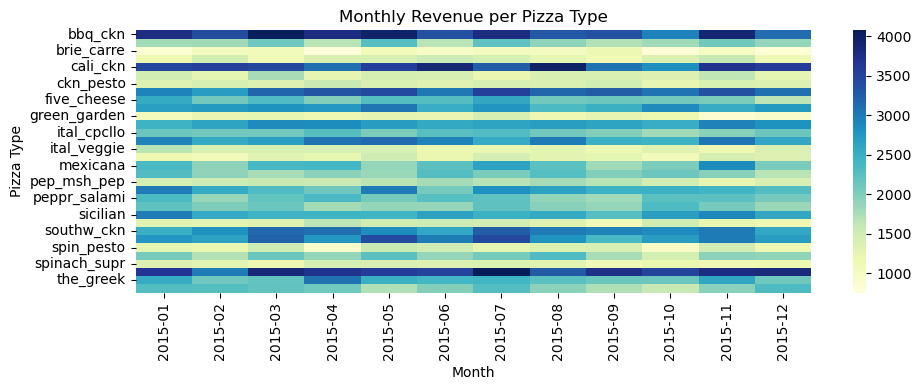

In [26]:
# Pizza Type Performance Heatmap
monthly_pizza = merged_data.copy()
monthly_pizza['month'] = monthly_pizza['date'].dt.to_period('M')
pizza_pivot = monthly_pizza.pivot_table(
    index='pizza_type_id', columns='month', values='revenue', aggfunc='sum', fill_value=0
)
# Visualization
plt.figure(figsize=(10, 4))
sns.heatmap(pizza_pivot, cmap='YlGnBu')
plt.title('Monthly Revenue per Pizza Type')
plt.xlabel('Month')
plt.ylabel('Pizza Type')
plt.tight_layout()
plt.show()

### 2. Revenue by day of week and hour

In [27]:
#Revenue by Day and Hour Heatmap
merged_data['hour'] = pd.to_datetime(merged_data['time']).dt.hour
merged_data['day_of_week'] = merged_data['date'].dt.day_name()
hourly_day = merged_data.groupby(['day_of_week', 'hour'])['revenue'].sum().unstack().fillna(0)

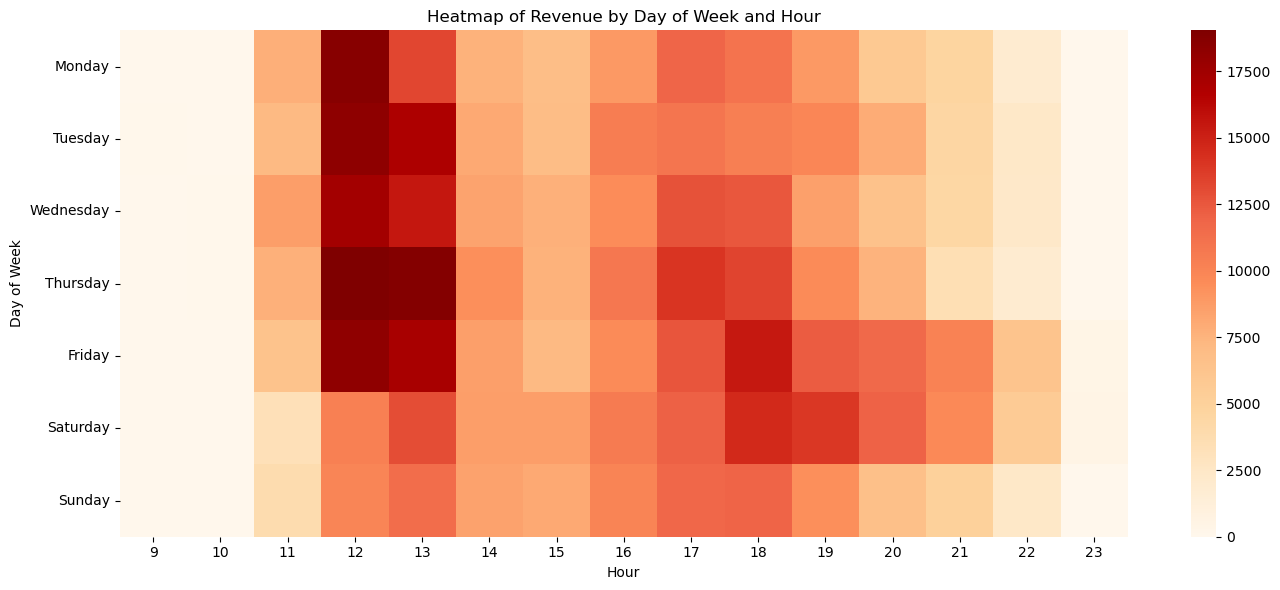

In [28]:
# Order days correctly
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hourly_day = hourly_day.reindex(order)

plt.figure(figsize=(14, 6))
sns.heatmap(hourly_day, cmap='OrRd')
plt.title('Heatmap of Revenue by Day of Week and Hour')
plt.xlabel('Hour')
plt.ylabel('Day of Week')
plt.tight_layout()
plt.show()

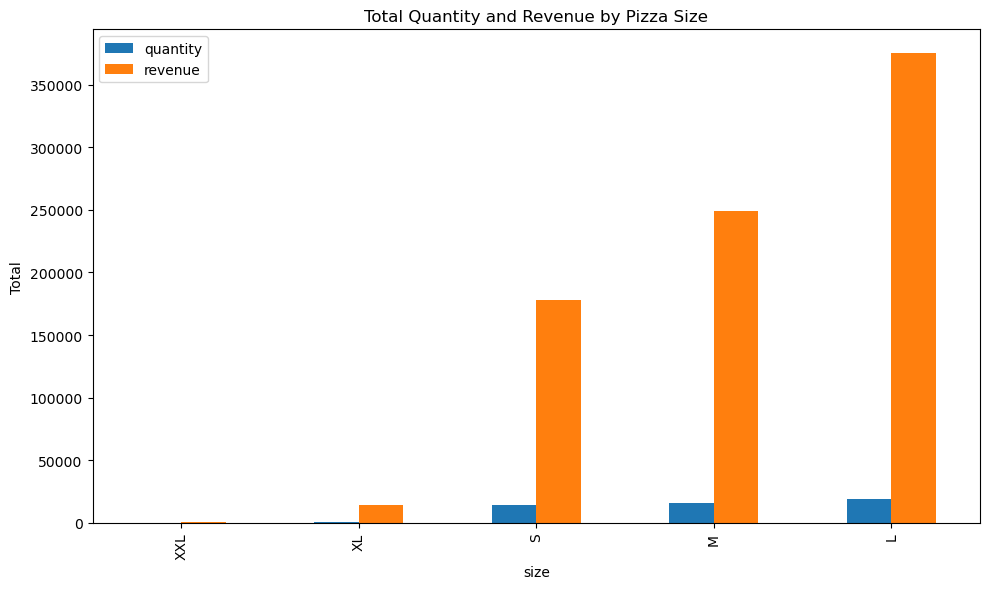

In [29]:
# Size Analysis
if 'size' in merged_data.columns:
    size_summary = merged_data.groupby('size')[['quantity', 'revenue']].sum().sort_values(by='revenue')
    size_summary.plot(kind='bar', figsize=(10, 6))
    plt.title('Total Quantity and Revenue by Pizza Size')
    plt.ylabel('Total')
    plt.tight_layout()
    plt.show()